In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the data from the CSV file
data = pd.read_csv('C:/Users/KIIT/Documents/Subjects/Food_Reccomender/indian_food.csv')

In [10]:
# Display basic information about the dataset
print("Column Names:")
print(data.columns)
print("\nData Types:")
print(data.dtypes)
print("\nStatistical Summary:")
print(data.describe())



Column Names:
Index(['dishes', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

Data Types:
dishes            object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

Statistical Summary:
        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [11]:
# Additional Questions:

# 1. Most popular food
popular_food = data['dishes'].value_counts().idxmax()
print("\nMost Popular Food:", popular_food)

# 2. Number of dishes based on flavor profile
flavor_profile_count = data['flavor_profile'].value_counts()
print("\nNumber of Dishes based on Flavor Profile:")
print(flavor_profile_count)

# 3. Number of dishes based on course
course_count = data['course'].value_counts()
print("\nNumber of Dishes based on Course:")
print(course_count)

# 4. Number of dishes from each state
state_count = data['state'].value_counts()
print("\nNumber of Dishes from Each State:")
print(state_count)

# 5. Number of vegetarian and non-vegetarian dishes
vegetarian_count = (data['diet'] == 'vegetarian').sum()
non_vegetarian_count = (data['diet'] == 'non vegetarian').sum()
print("\nNumber of Vegetarian Dishes:", vegetarian_count)
print("Number of Non-Vegetarian Dishes:", non_vegetarian_count)


Most Popular Food: Balu shahi

Number of Dishes based on Flavor Profile:
spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

Number of Dishes based on Course:
main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

Number of Dishes from Each State:
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64

Number of Vegetarian Dishes: 226
Number of Non-Vegetarian Dishes: 29


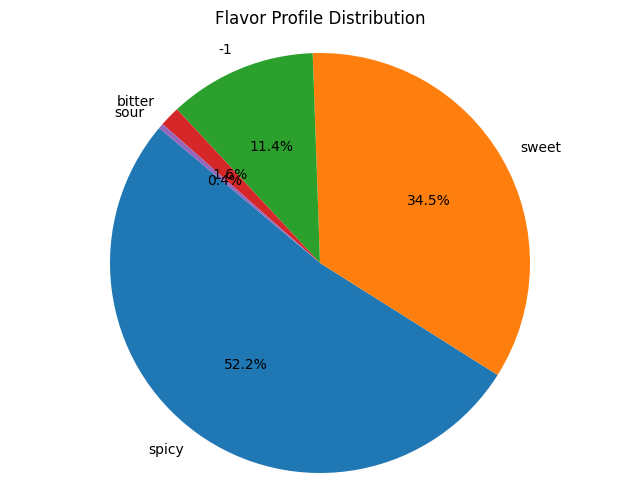

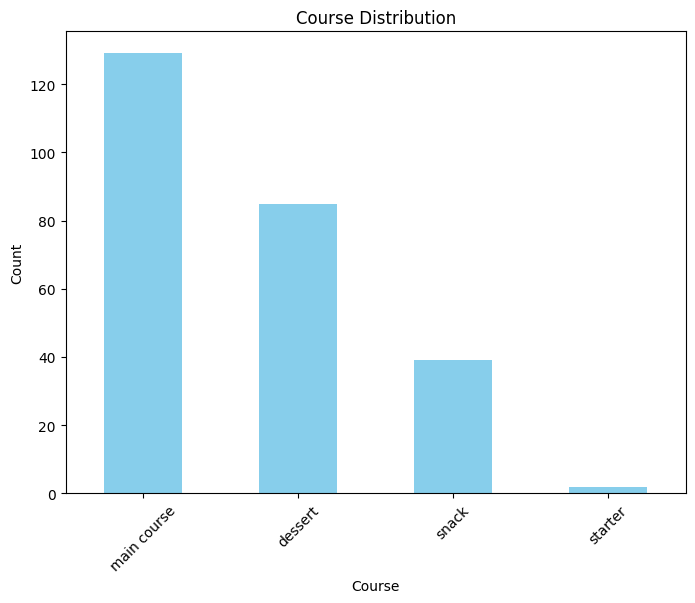

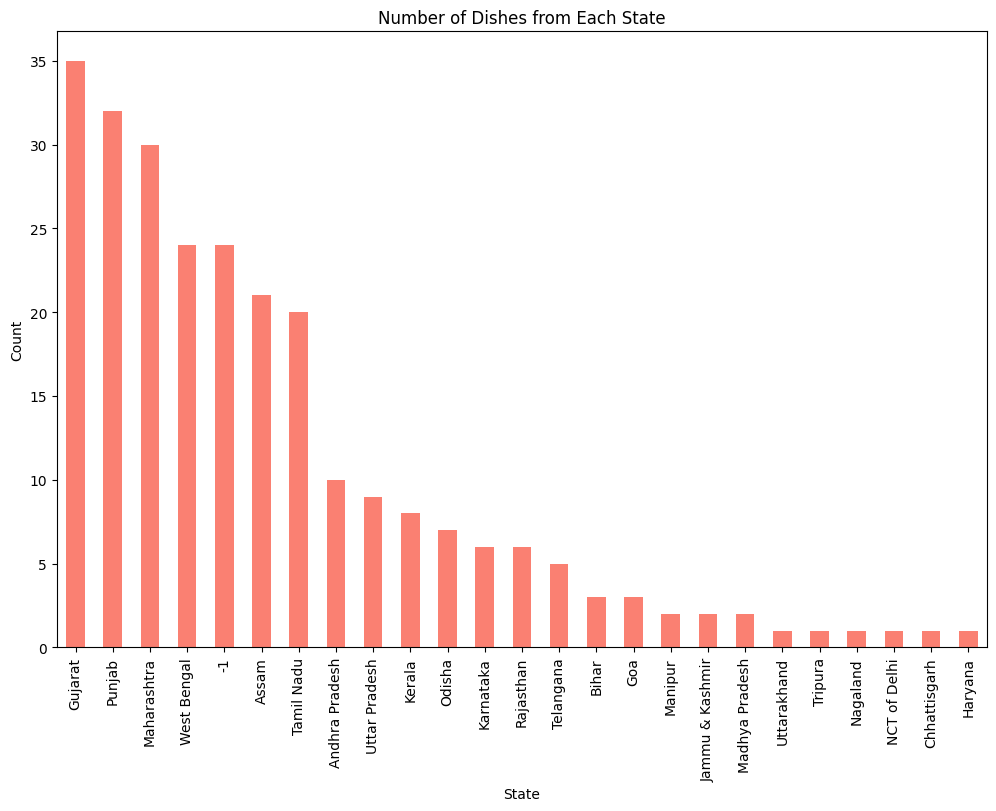

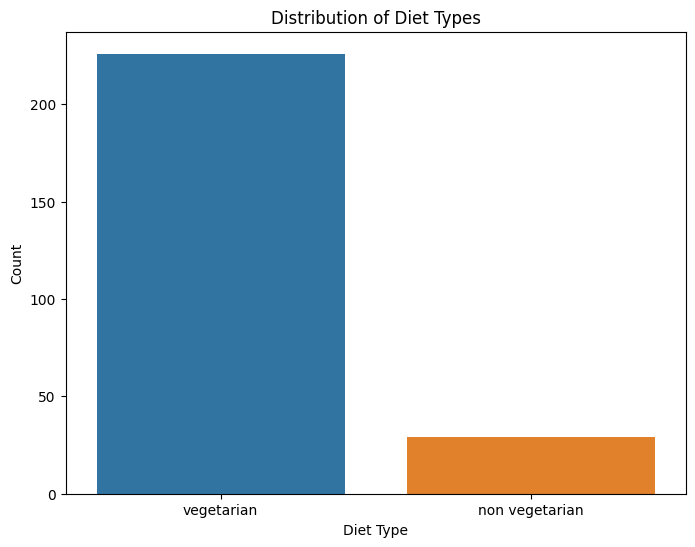

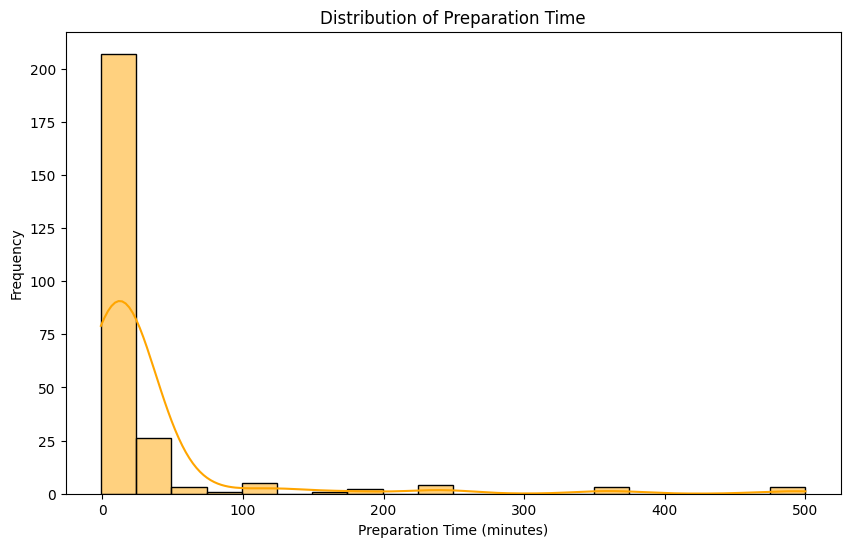

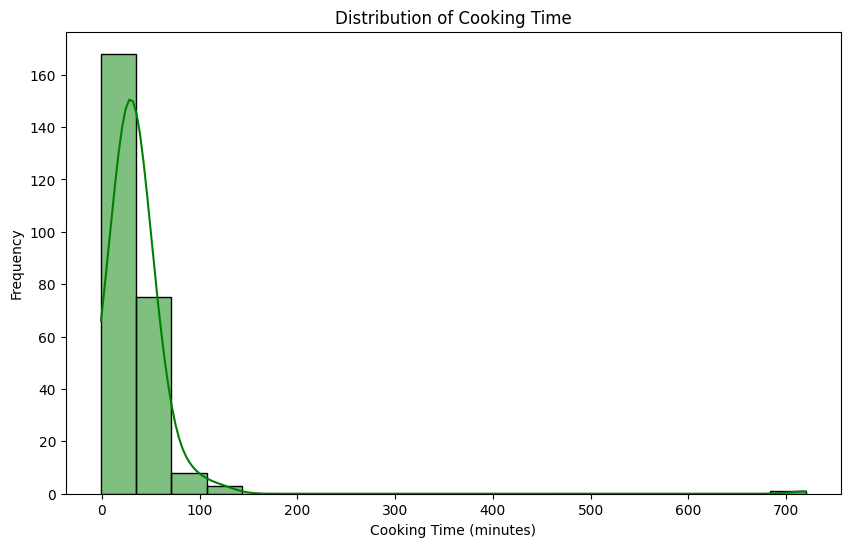

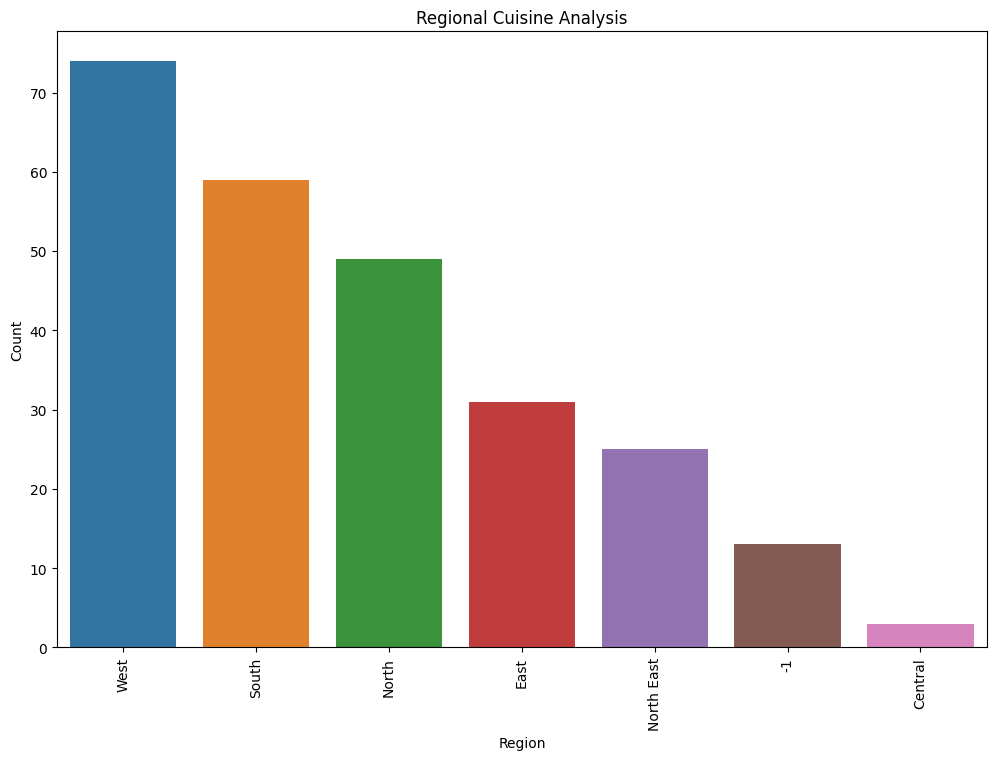

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17060\139709188.py:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


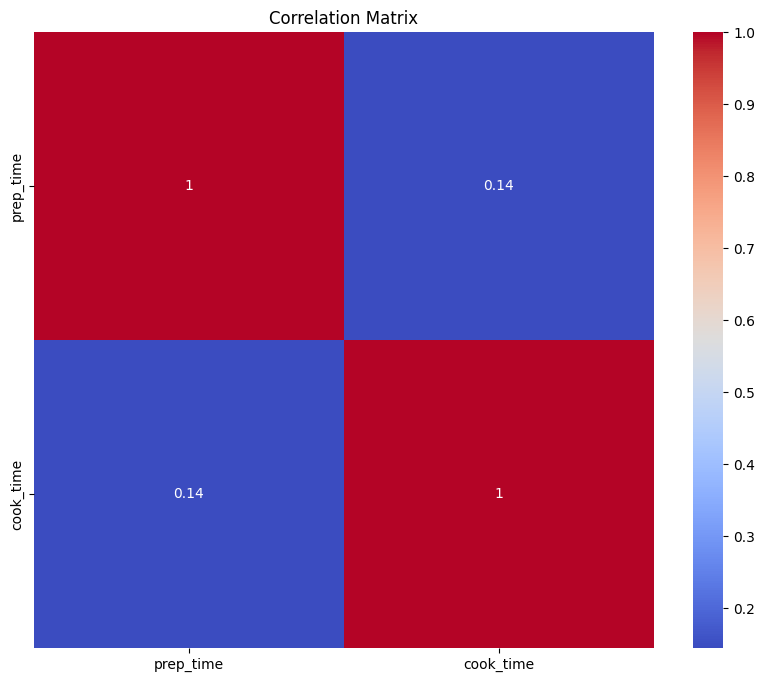

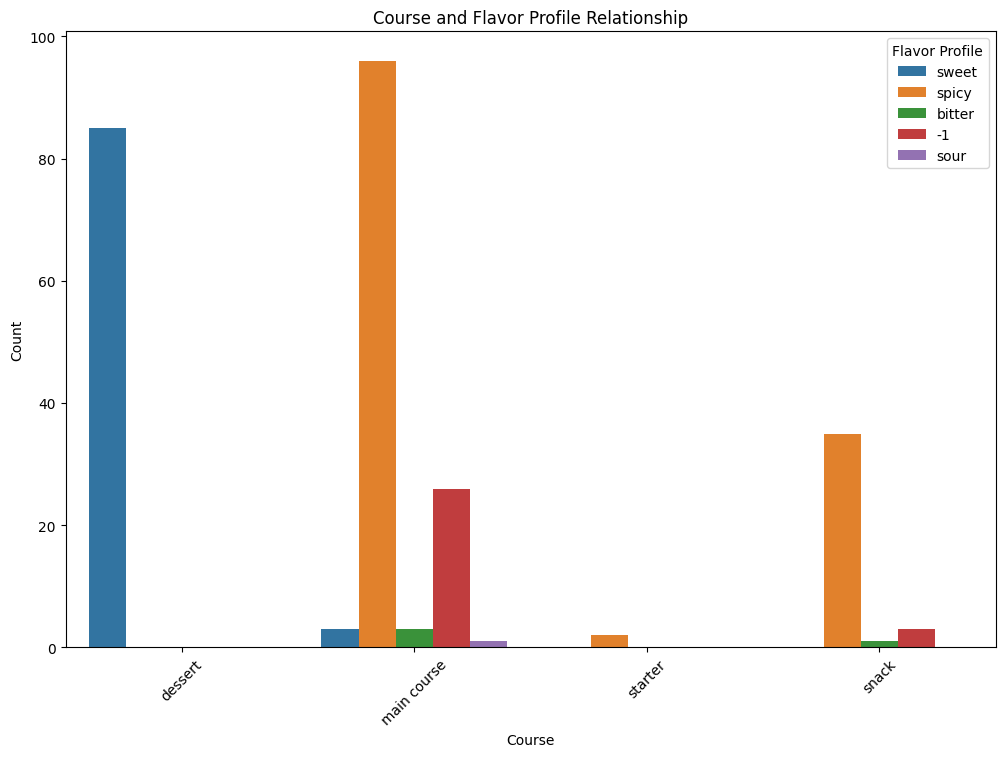

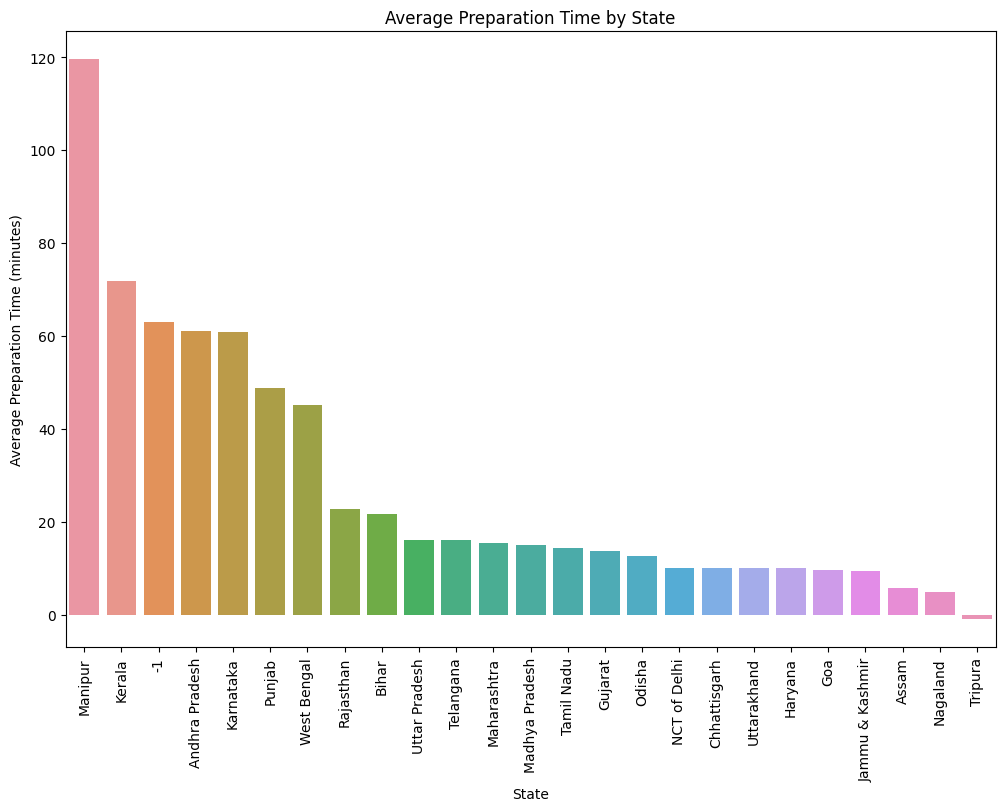

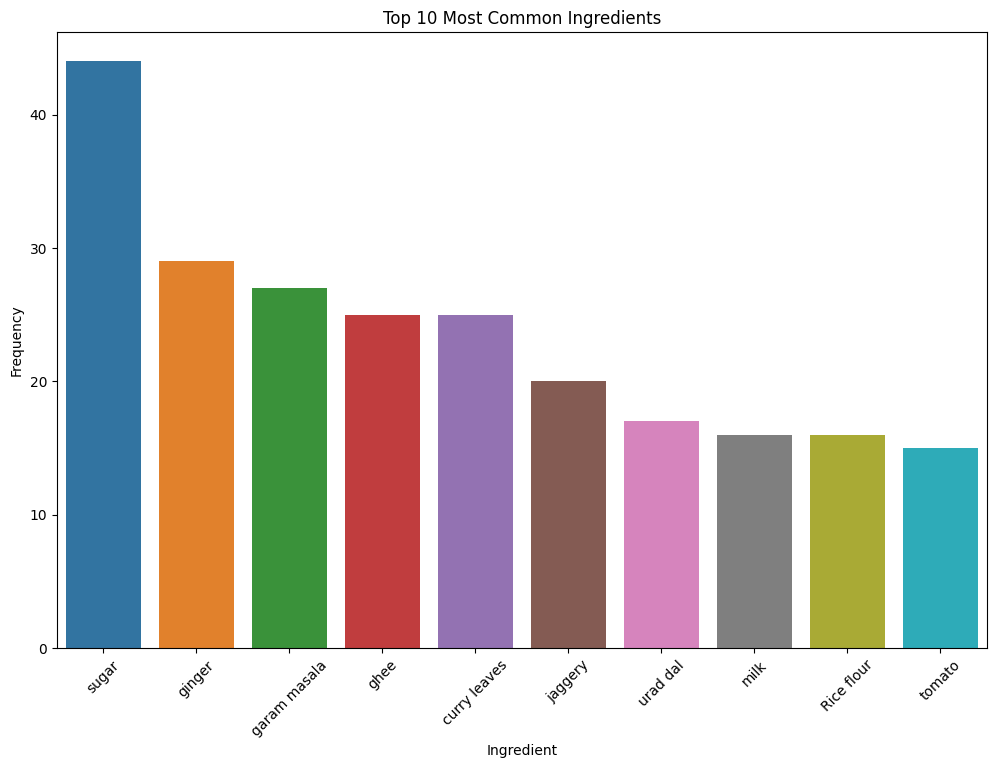

In [12]:
# Visualizations:

# Pie chart for flavor profile distribution
plt.figure(figsize=(8, 6))
plt.pie(flavor_profile_count, labels=flavor_profile_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Flavor Profile Distribution')
plt.axis('equal')
plt.show()

# Bar plot for course distribution
plt.figure(figsize=(8, 6))
course_count.plot(kind='bar', color='skyblue')
plt.title('Course Distribution')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot for number of dishes from each state
plt.figure(figsize=(12, 8))
state_count.plot(kind='bar', color='salmon')
plt.title('Number of Dishes from Each State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Distribution of Diet Types
diet_distribution = data['diet'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=diet_distribution.index, y=diet_distribution.values)
plt.title('Distribution of Diet Types')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

# Preparation Time Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['prep_time'], bins=20, kde=True, color='orange')
plt.title('Distribution of Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Cooking Time Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['cook_time'], bins=20, kde=True, color='green')
plt.title('Distribution of Cooking Time')
plt.xlabel('Cooking Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Regional Cuisine Analysis
plt.figure(figsize=(12, 8))
regional_cuisine_count = data['region'].value_counts()
sns.barplot(x=regional_cuisine_count.index, y=regional_cuisine_count.values)
plt.title('Regional Cuisine Analysis')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Course and Flavor Profile Relationship
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='course', hue='flavor_profile')
plt.title('Course and Flavor Profile Relationship')
plt.xlabel('Course')
plt.ylabel('Count')
plt.legend(title='Flavor Profile')
plt.xticks(rotation=45)
plt.show()

# State-wise Preparation Time
plt.figure(figsize=(12, 8))
state_prep_time = data.groupby('state')['prep_time'].mean().sort_values(ascending=False)
sns.barplot(x=state_prep_time.index, y=state_prep_time.values)
plt.title('Average Preparation Time by State')
plt.xlabel('State')
plt.ylabel('Average Preparation Time (minutes)')
plt.xticks(rotation=90)
plt.show()

# Ingredient Frequency Analysis
from collections import Counter
ingredients_list = [ingredient.strip() for sublist in data['ingredients'].str.split(',') for ingredient in sublist]
ingredient_counter = Counter(ingredients_list)
most_common_ingredients = ingredient_counter.most_common(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=[ingredient[0] for ingredient in most_common_ingredients], y=[ingredient[1] for ingredient in most_common_ingredients])
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

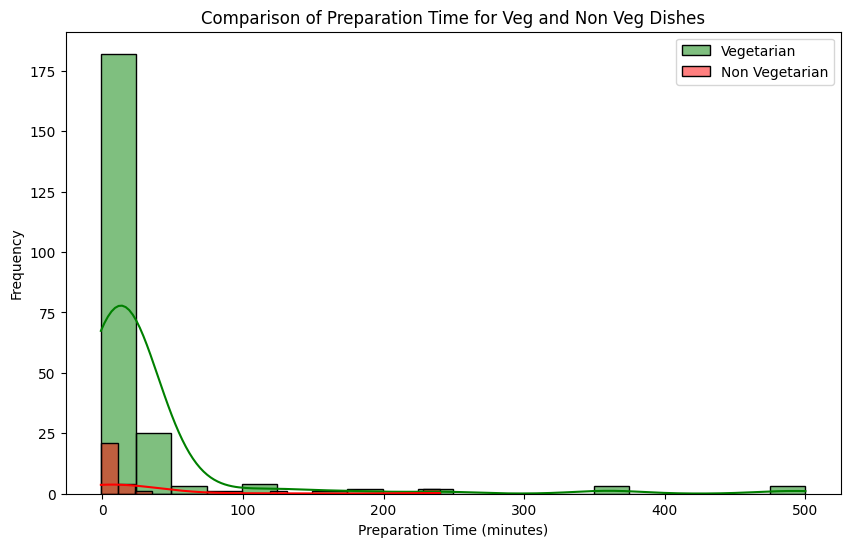

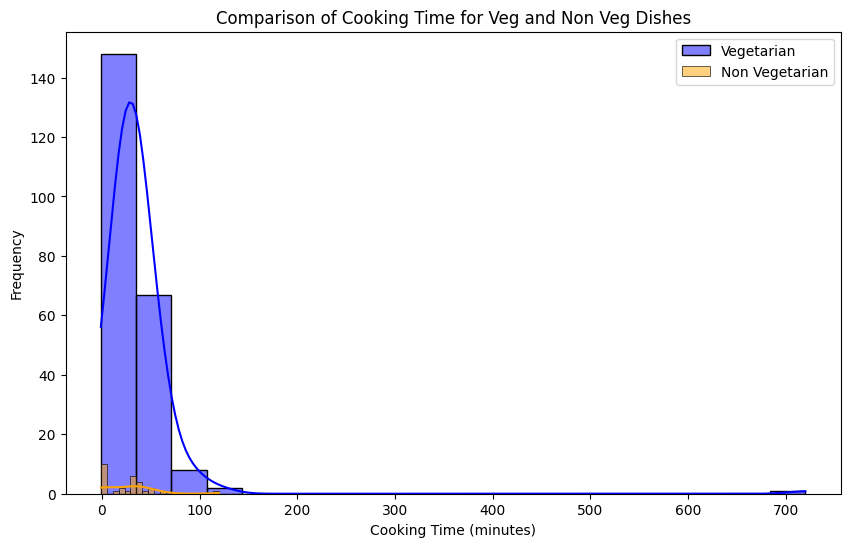

Preparation Time for Vegetarian Dishes:
count    226.000000
mean      31.623894
std       73.794701
min       -1.000000
25%       10.000000
50%       10.000000
75%       20.000000
max      500.000000
Name: prep_time, dtype: float64

Preparation Time for Non Vegetarian Dishes:
count     29.000000
mean      27.068966
std       63.043597
min       -1.000000
25%       -1.000000
50%       10.000000
75%       15.000000
max      240.000000
Name: prep_time, dtype: float64

Cooking Time for Vegetarian Dishes:
count    226.000000
mean      35.641593
std       50.296453
min       -1.000000
25%       20.000000
50%       30.000000
75%       40.000000
max      720.000000
Name: cook_time, dtype: float64

Cooking Time for Non Vegetarian Dishes:
count     29.000000
mean      25.862069
std       26.768484
min       -1.000000
25%       -1.000000
50%       30.000000
75%       40.000000
max      120.000000
Name: cook_time, dtype: float64


In [13]:
# Filter vegetarian and non-vegetarian dishes
veg_data = data[data['diet'] == 'vegetarian']
non_veg_data = data[data['diet'] == 'non vegetarian']

# Plotting preparation time for Veg and Non Veg dishes
plt.figure(figsize=(10, 6))
sns.histplot(veg_data['prep_time'], bins=20, kde=True, color='green', label='Vegetarian')
sns.histplot(non_veg_data['prep_time'], bins=20, kde=True, color='red', label='Non Vegetarian')
plt.title('Comparison of Preparation Time for Veg and Non Veg Dishes')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting cooking time for Veg and Non Veg dishes
plt.figure(figsize=(10, 6))
sns.histplot(veg_data['cook_time'], bins=20, kde=True, color='blue', label='Vegetarian')
sns.histplot(non_veg_data['cook_time'], bins=20, kde=True, color='orange', label='Non Vegetarian')
plt.title('Comparison of Cooking Time for Veg and Non Veg Dishes')
plt.xlabel('Cooking Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Summary statistics for preparation time
veg_prep_stats = veg_data['prep_time'].describe()
non_veg_prep_stats = non_veg_data['prep_time'].describe()

# Summary statistics for cooking time
veg_cook_stats = veg_data['cook_time'].describe()
non_veg_cook_stats = non_veg_data['cook_time'].describe()

# Print the summary statistics
print("Preparation Time for Vegetarian Dishes:")
print(veg_prep_stats)
print("\nPreparation Time for Non Vegetarian Dishes:")
print(non_veg_prep_stats)

print("\nCooking Time for Vegetarian Dishes:")
print(veg_cook_stats)
print("\nCooking Time for Non Vegetarian Dishes:")
print(non_veg_cook_stats)